In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
wine = pd.read_csv('https://bit.ly/wine_csv_data')


In [2]:
wine

,alcohol,sugar,pH,class
0,9.4,1.9,3.51,0.0
1,9.8,2.6,3.20,0.0
2,9.8,2.3,3.26,0.0
3,9.8,1.9,3.16,0.0
4,9.4,1.9,3.51,0.0
...,...,...,...,...
6492,11.2,1.6,3.27,1.0
6493,9.6,8.0,3.15,1.0
6494,9.4,1.2,2.99,1.0
6495,12.8,1.1,3.34,1.0


In [4]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   alcohol  6497 non-null   float64
 1   sugar    6497 non-null   float64
 2   pH       6497 non-null   float64
 3   class    6497 non-null   float64
dtypes: float64(4)
memory usage: 203.2 KB


In [5]:
data = wine[['alcohol','sugar','pH']].to_numpy()
target = wine['class'].to_numpy()
train_input, test_input, train_target, test_target = train_test_split(
    data, target, test_size = 0.2, random_state = 42)

Text(0, 0.5, 'Frequency')

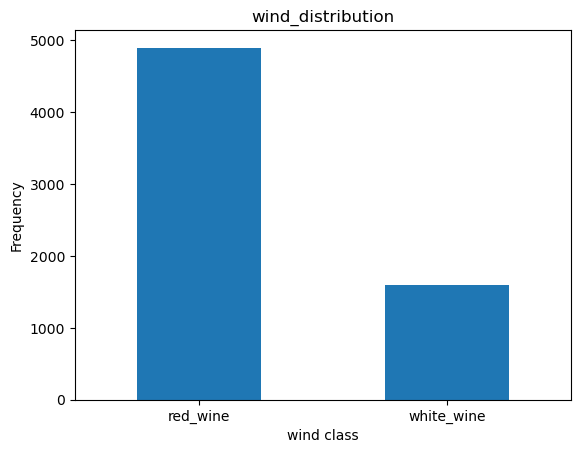

In [6]:
LABELS = ['red_wine', 'white_wine']
import matplotlib.pyplot as plt

count_classes = pd.value_counts(wine['class'], sort = True)
count_classes.plot(kind = 'bar', rot = 0)
plt.title('wind_distribution')
plt.xticks(range(2), LABELS)
plt.xlabel('wind class')
plt.ylabel('Frequency')

In [7]:
# 결정 트리

In [8]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

In [9]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state = 42)
dt.fit(train_scaled, train_target)
print(dt.score(train_scaled, train_target))
print(dt.score(test_scaled, test_target))

0.996921300750433
0.8592307692307692


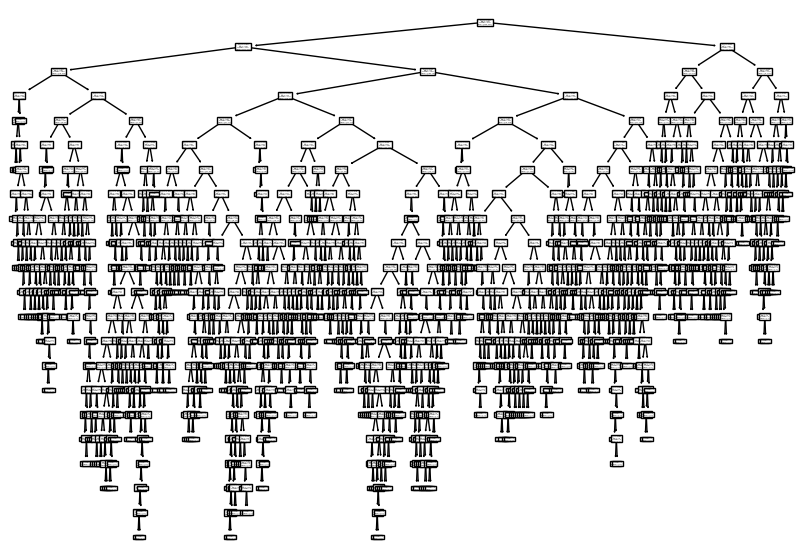

In [10]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
plt.figure(figsize=(10,7))
plot_tree(dt)
plt.show()

In [11]:
# 랜덤 포레스트

In [12]:
from sklearn.model_selection import cross_validate
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_jobs = -1, random_state = 42)

scores = cross_validate(rf, train_input, train_target, 
                        return_train_score = True, n_jobs = -1)
print(np.mean(scores['train_score']), np.mean(scores['test_score']))

0.9973541965122431 0.8905151032797809


In [13]:
rf.fit(train_input, train_target)
print(rf.feature_importances_)

[0.23167441 0.50039841 0.26792718]


In [14]:
# 엑스트라 트리

In [15]:
from sklearn.ensemble import ExtraTreesClassifier
et = ExtraTreesClassifier(n_jobs = -1, random_state = 42)
scores = cross_validate(et, train_input, train_target,
                        return_train_score = True, n_jobs = -1)
print(np.mean(scores['train_score']), np.mean(scores['test_score']))

0.9974503966084433 0.8887848893166506


In [16]:
et.fit(train_input, train_target)
print(et.feature_importances_)

[0.20183568 0.52242907 0.27573525]


In [17]:
# 그레이디언트 부스팅

In [21]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier(random_state = 42)
scores = cross_validate(gd, train_input, train_target, 
                        return_train_score = True, n_jobs = -1)
print(np.mean(scores['train_score']), np.mean(scores['test_score']))

0.8881086892152563 0.8720430147331015


In [22]:
gb.fit(train_input, train_target)
print(gb.feature_importances_)

[0.11949946 0.74871836 0.13178218]


In [23]:
# 히스토그램 그레이디언트 부스팅

In [24]:
from sklearn.ensemble import HistGradientBoostingClassifier
hgb = HistGradientBoostingClassifier(random_state=42)
scores = cross_validate(hgb, train_input, train_target, return_train_score = True)
print(np.mean(scores['train_score']), np.mean(scores['test_score']))

0.9321723946453317 0.8801241948619236


In [25]:
from sklearn.inspection import permutation_importance
hgb.fit(train_input, train_target)
result = permutation_importance(hgb, train_input, train_target,
                               n_repeats = 10, random_state = 42, n_jobs = -1)
print(result.importances_mean)

[0.08876275 0.23438522 0.08027708]


In [26]:
result = permutation_importance(hgb, test_input, test_target,
                               n_repeats = 10, random_state = 42, n_jobs = -1)
print(result.importances_mean)

[0.05969231 0.20238462 0.049     ]


In [27]:
hgb.score(test_input, test_target)

0.8723076923076923